# Exploración general

## Librerías

`pandas` es la principal librería de análisis de datos en python. Permite leer todo tipo de formatos tabulares en un `DataFrame` (objeto principal de la librería) desde el cual luego se pueden realizar todo tipo de transformaciones, procesamientos y graficar fácilmente.

In [1]:
import pandas as pd

`geopandas` es una librería hermana que se utiliza para analizar datos geográficos.

In [2]:
import geopandas as gpd

`matplotlib` es una librería de gráficos de python de uso muy difundido, que se usa en `pandas`.

In [3]:
# permite que los gráficos se vean directamente en el notebook
%matplotlib inline 

# aplica una hoja de estilos para los gráficos
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

`seaborn` es una librería que permite hacer gráficos más avanzados con menos código.

In [4]:
import seaborn as sns

## Gráficos simples y correlación de variables

Vamos a usar los datos de estadísticas de trámites automotores (https://datos.gob.ar/dataset/justicia_1ab0cc03-ab9b-4520-975c-5757d87d1061) y de motovehículos (https://datos.gob.ar/dataset/justicia_72d85f23-b751-4d12-935b-25e32ed9445e). El último CSV disponible en cada dataset incluye toda la historia.

In [5]:
# tomamos los datos de Estadísticas de Trámites Automotores
autos = pd.read_csv("http://datos.jus.gob.ar/dataset/1ab0cc03-ab9b-4520-975c-5757d87d1061/resource/4358c995-bb04-4ad9-be4a-a9076dc3e42c/download/estadistica-inscripciones-iniciales-automotores-2019-02.csv")

In [6]:
autos.head()

,tipo_vehiculo,anio_inscripcion_inicial,mes_inscripcion_inicial,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_indec_id
0,Automotores,2000,1,Buenos Aires,B,16346,6
1,Automotores,2000,1,Catamarca,K,361,10
2,Automotores,2000,1,Chaco,H,551,22
3,Automotores,2000,1,Chubut,U,802,26
4,Automotores,2000,1,Ciudad Autónoma de Bs.As.,C,8892,2


Chequeamos cuál es la "clave primaria" o el conjunto de dimensiones que nos permiten identinficar una única fila en la tabla. Para esto, primero debemos ver que no haya filas duplicadas.

In [7]:
len(autos), len(autos.drop_duplicates())

(5544, 5544)

Ahora, queremos descubrir cuál es el conjunto mínimo de dimensiones que sigue dando la misma cantidad de filas no repetidas. Esto _es_ una "clave primaria".

In [8]:
len(autos[["anio_inscripcion_inicial", "mes_inscripcion_inicial"]].drop_duplicates())

231

El tiempo por sí solo no es clave primaria de esta tabla. La combinación año-mes (230) no alcanzn para identificar a todas las filas. Existe por lo menos una dimensión de apertura más que hay que incorporar.

In [9]:
len(autos[["anio_inscripcion_inicial", "mes_inscripcion_inicial", "provincia_inscripcion_inicial"]].drop_duplicates())

5544

Esta tabla tiene "clave primaria" año-mes-provincia. Son las 3 dimensiones de apertura que tienen los datos que contiene.

Ahora vas a agregar los datos por año y ver la evolución en el tiempo de las inscripciones de autos. Para esto tenés que elegir:

1. El o los campos de la tabla por los que vas a agrupar los datos
2. La función de agregación (suma, promedio, máximo, mínimo, etc)
3. El o los campos con los que te querés quedar, en donde esta agregación _tiene sentido_

In [10]:
autos_inscripciones_anuales = autos.groupby("anio_inscripcion_inicial").sum()["cantidad_inscripciones_iniciales"]
autos_inscripciones_anuales

anio_inscripcion_inicial
2000    352811
2001    206653
2002    101231
2003    146047
2004    292479
2005    389234
2006    452582
2007    572841
2008    615256
2009    516799
2010    665552
2011    860820
2012    845562
2013    963598
2014    688480
2015    657161
2016    711446
2017    902733
2018    805143
2019    139695
Name: cantidad_inscripciones_iniciales, dtype: int64

El año 2019 acaba de empezar, así que no sirve para una agregación anual.

In [11]:
# al agrupar por año, esta variable se convierte en el "índice" o "clave primaria" de la tabla
# podemos filtrar por el índice
autos_inscripciones_anuales = autos_inscripciones_anuales[autos_inscripciones_anuales.index < 2019]

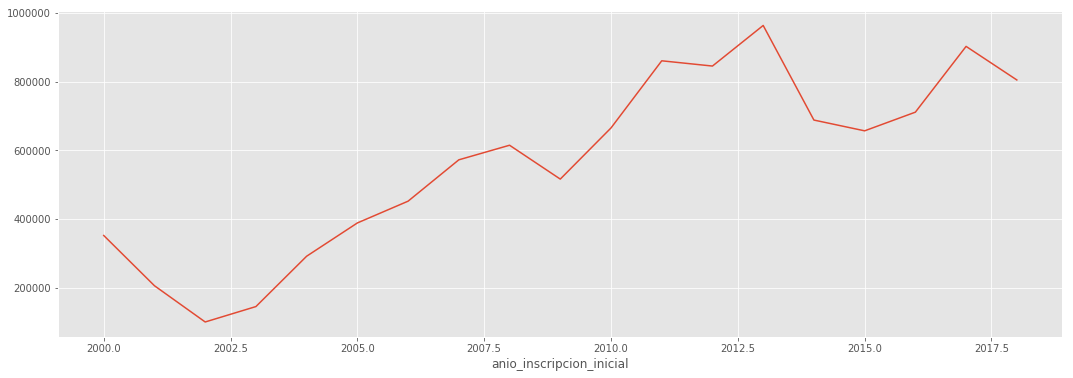

In [12]:
autos_inscripciones_anuales.plot(figsize=(18,6))

El eje X que muestra el año no parece muy útil... se puede especificar las etiquetas de un eje explícitamente.

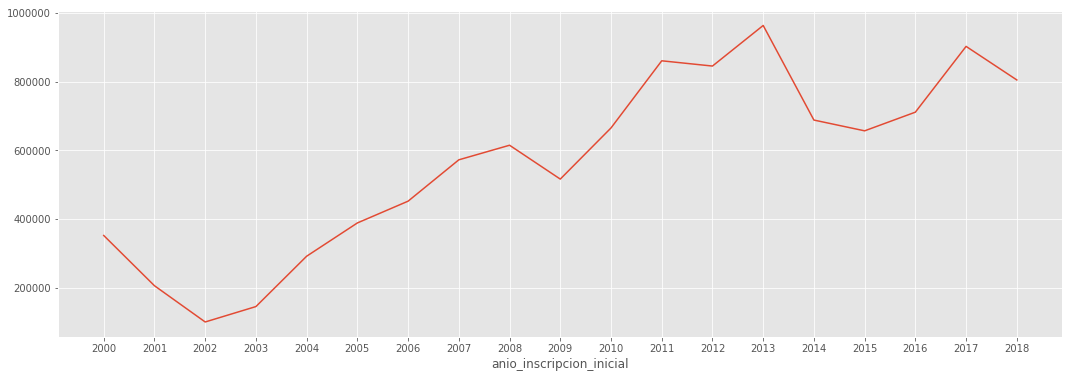

In [13]:
autos_inscripciones_anuales.plot(figsize=(18,6), xticks=autos_inscripciones_anuales.index)

Esta serie tiene un parecido notable con el nivel de actividad económica. Deberías ver si hay alguna correlación entre las inscripciones de autos por año y el Producto Bruto Interno.

En datos.gob.ar/series podés buscar entre más de 20 mil series de tiempo y copiar el link de descarga CSV. La serie de PBI anual a precios constantes se puede ver en: https://datos.gob.ar/series/api/series/?ids=9.1_PP2_2004_A_16.

In [14]:
pbi = pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=9.1_PP2_2004_A_16&limit=5000&format=csv")

In [15]:
pbi

,indice_tiempo,pib_precios_2004
0,2004-01-01,485115.195206
1,2005-01-01,528055.942503
2,2006-01-01,570549.404221
3,2007-01-01,621942.502646
4,2008-01-01,647176.159741
5,2009-01-01,608872.876413
6,2010-01-01,670523.679442
7,2011-01-01,710781.597221
8,2012-01-01,703485.989459
9,2013-01-01,720407.105303


Necesitás que ambas series tengan el mismo índice o clave primaria para poder graficarlas juntas, así que vas a construir la variable "anio" para la serie de PBI. Para esto hay que tomar la fecha y asignarla como índice del dataframe.

In [16]:
# transforma el tipo de la variable de texto a fecha
pbi["indice_tiempo"] = pd.to_datetime(pbi.indice_tiempo)

In [17]:
# extrae el año de la fecha para conformar el índice
pbi.index = pbi.indice_tiempo.dt.year

In [18]:
pbi.pib_precios_2004

indice_tiempo
2004    485115.195206
2005    528055.942503
2006    570549.404221
2007    621942.502646
2008    647176.159741
2009    608872.876413
2010    670523.679442
2011    710781.597221
2012    703485.989459
2013    720407.105303
2014    702306.045963
2015    721487.146638
2016    706477.848598
2017    725330.848522
2018    707091.754391
Name: pib_precios_2004, dtype: float64

In [19]:
autos_inscripciones_anuales

anio_inscripcion_inicial
2000    352811
2001    206653
2002    101231
2003    146047
2004    292479
2005    389234
2006    452582
2007    572841
2008    615256
2009    516799
2010    665552
2011    860820
2012    845562
2013    963598
2014    688480
2015    657161
2016    711446
2017    902733
2018    805143
Name: cantidad_inscripciones_iniciales, dtype: int64

In [20]:
# creamos un dataframe con ambas series
pbi_patentamientos = pd.DataFrame({
    "pbi": pbi.pib_precios_2004, 
    "patentamientos_autos": autos_inscripciones_anuales
})

In [21]:
pbi_patentamientos

,pbi,patentamientos_autos
2000,NaN,352811
2001,NaN,206653
2002,NaN,101231
2003,NaN,146047
2004,485115.195206,292479
2005,528055.942503,389234
2006,570549.404221,452582
2007,621942.502646,572841
2008,647176.159741,615256
2009,608872.876413,516799


In [22]:
# al graficar ambas series se ve que tienen diferentes escalas
# pbi_patentamientos.plot(figsize=(18,6), xticks=pbi_patentamientos.index)

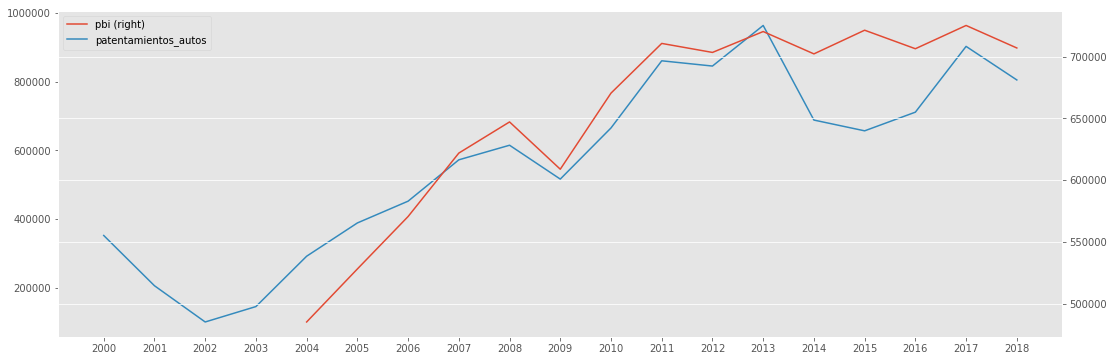

In [23]:
# graficamos el PBI en el eje secundario, porque tienen escalas distintas
pbi_patentamientos.plot(secondary_y="pbi", figsize=(18,6), xticks=pbi_patentamientos.index)

Podés ver fácilmente la correlación entre las series con la función `.corr()` 

In [24]:
pbi_patentamientos.corr()

,pbi,patentamientos_autos
pbi,1.00000,0.92102
patentamientos_autos,0.92102,1.00000


**Ejercicio:** repetir todo el ejercicio para analizar si la correlación entre el PBI y los patentamientos de autos es mayor o menos que entre el PBI y los patentamientos de motos. Hint: recordá que la estructura de ambas tablas es la misma, así que podés reutilizar todo el código.

## Estacionalidad y promedio móvil

Ahora queremos hacer _zoom_ en cómo se comportan los patentamientos de autos a lo largo del año. Vamos a tener que crear un índice de tiempo para el dataframe de autos que incluya al mes. El año sólo no nos sirve, y ambos están separados en columnas diferentes.

In [25]:
autos.head()

,tipo_vehiculo,anio_inscripcion_inicial,mes_inscripcion_inicial,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_indec_id
0,Automotores,2000,1,Buenos Aires,B,16346,6
1,Automotores,2000,1,Catamarca,K,361,10
2,Automotores,2000,1,Chaco,H,551,22
3,Automotores,2000,1,Chubut,U,802,26
4,Automotores,2000,1,Ciudad Autónoma de Bs.As.,C,8892,2


`Pandas` permite crear funciones que reciben fila por fila (o columna por columna) del dataframe y realizan alguna operación. Luego de crearla podés aplicarla al dataframe (que recorre todas las filas usando la función) y guardar el resultado en una nueva columna.

In [26]:
def crear_indice_tiempo(row):
    mes_str = "{}-{}".format(row["anio_inscripcion_inicial"], row["mes_inscripcion_inicial"])
    return pd.to_datetime(mes_str)

In [27]:
autos["indice_tiempo"] = autos.apply(crear_indice_tiempo, axis=1)

In [28]:
autos.head()

,tipo_vehiculo,anio_inscripcion_inicial,mes_inscripcion_inicial,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_indec_id,indice_tiempo
0,Automotores,2000,1,Buenos Aires,B,16346,6,2000-01-01
1,Automotores,2000,1,Catamarca,K,361,10,2000-01-01
2,Automotores,2000,1,Chaco,H,551,22,2000-01-01
3,Automotores,2000,1,Chubut,U,802,26,2000-01-01
4,Automotores,2000,1,Ciudad Autónoma de Bs.As.,C,8892,2,2000-01-01


Ahora tenés que agrupar los datos sumando patentamientos de todas las provincias por mes. Pero vos ya sabés hacer esto.

**Ejercicio (obligatorio)**: crear la variable `autos_inscripciones_cant` que sea la cantidad total de patentamientos por mes que se hacen en la Argentina. Hint: recordá que ya creaste un `indice_tiempo` que es mensual, que tenés que usar la función `.sum()` y que la variable con la que te querés quedar es `cantidad_inscripciones_iniciales`.

indice_tiempo
2000-01-01     46926
2000-02-01     32798
2000-03-01     32504
2000-04-01     26641
2000-05-01     27580
2000-06-01     28428
2000-07-01     27415
2000-08-01     28868
2000-09-01     28157
2000-10-01     33588
2000-11-01     23625
2000-12-01     16281
2001-01-01     36451
2001-02-01     16107
2001-03-01     17594
2001-04-01     17129
2001-05-01     17606
2001-06-01     15780
2001-07-01     18749
2001-08-01     17566
2001-09-01     15180
2001-10-01     14763
2001-11-01     12547
2001-12-01      7181
2002-01-01     16382
2002-02-01      8812
2002-03-01     13497
2002-04-01     13641
2002-05-01     10255
2002-06-01      4412
               ...  
2016-10-01     63713
2016-11-01     59952
2016-12-01     40640
2017-01-01     95362
2017-02-01     59074
2017-03-01     78376
2017-04-01     65099
2017-05-01     77743
2017-06-01     78498
2017-07-01     80957
2017-08-01     87362
2017-09-01     80396
2017-10-01     78717
2017-11-01     73350
2017-12-01     47799
2018-01-01    120788

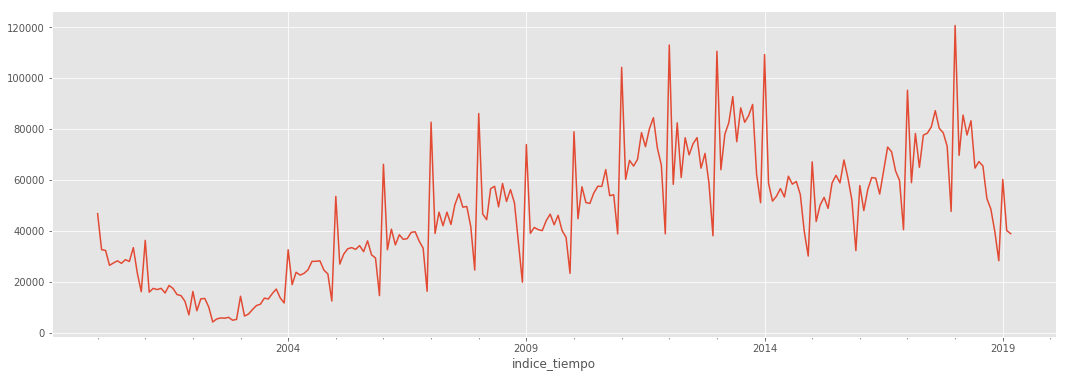

In [30]:
autos_inscripciones_cant.plot(figsize=(18,6))

Es difícil entender la tendencia en algunos períodos con tanta estacionalidad!

Una forma fácil de removerla es graficar el promedio móvil de los últimos 12 meses, para cada mes.

In [31]:
autos_estacionalidad = pd.DataFrame({
    "patentamientos_autos": autos_inscripciones_cant,
    "patentamientos_autos_pm12": autos_inscripciones_cant.rolling(12).mean()
})

In [32]:
autos_estacionalidad

,patentamientos_autos,patentamientos_autos_pm12
indice_tiempo,,
2000-01-01,46926,NaN
2000-02-01,32798,NaN
2000-03-01,32504,NaN
2000-04-01,26641,NaN
2000-05-01,27580,NaN
2000-06-01,28428,NaN
2000-07-01,27415,NaN
2000-08-01,28868,NaN
2000-09-01,28157,NaN


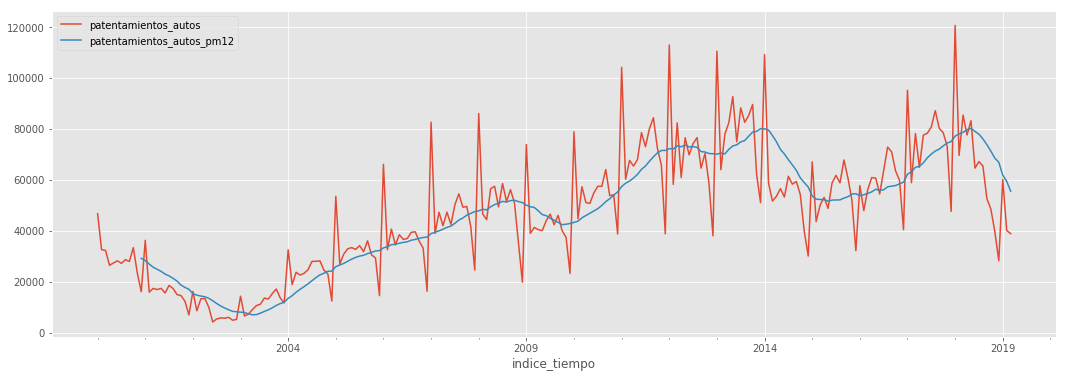

In [33]:
autos_estacionalidad.plot(figsize=(18,6))

Una forma de ver exclusivamente el efecto de la estacionalidad (sin la tendencia promedio) es justamente restar la tendencia del valor de cada mes.

In [34]:
est_sin_tendencia = autos_estacionalidad.patentamientos_autos - autos_estacionalidad.patentamientos_autos_pm12
est_sin_tendencia_pct = est_sin_tendencia / autos_estacionalidad.patentamientos_autos_pm12

In [35]:
est_sin_tendencia_pct

indice_tiempo
2000-01-01         NaN
2000-02-01         NaN
2000-03-01         NaN
2000-04-01         NaN
2000-05-01         NaN
2000-06-01         NaN
2000-07-01         NaN
2000-08-01         NaN
2000-09-01         NaN
2000-10-01         NaN
2000-11-01         NaN
2000-12-01   -0.446242
2001-01-01    0.277727
2001-02-01   -0.406458
2001-03-01   -0.320553
2001-04-01   -0.317622
2001-05-01   -0.274600
2001-06-01   -0.320318
2001-07-01   -0.166510
2001-08-01   -0.184976
2001-09-01   -0.258475
2001-10-01   -0.218996
2001-11-01   -0.302146
2001-12-01   -0.583011
2002-01-01    0.053595
2002-02-01   -0.410204
2002-03-01   -0.075506
2002-04-01   -0.046662
2002-05-01   -0.251246
2002-06-01   -0.653927
                ...   
2016-10-01    0.099293
2016-11-01    0.023056
2016-12-01   -0.314523
2017-01-01    0.528115
2017-02-01   -0.066995
2017-03-01    0.203104
2017-04-01   -0.005788
2017-05-01    0.162360
2017-06-01    0.139751
2017-07-01    0.151506
2017-08-01    0.221879
2017-09-01    0.1125

[]

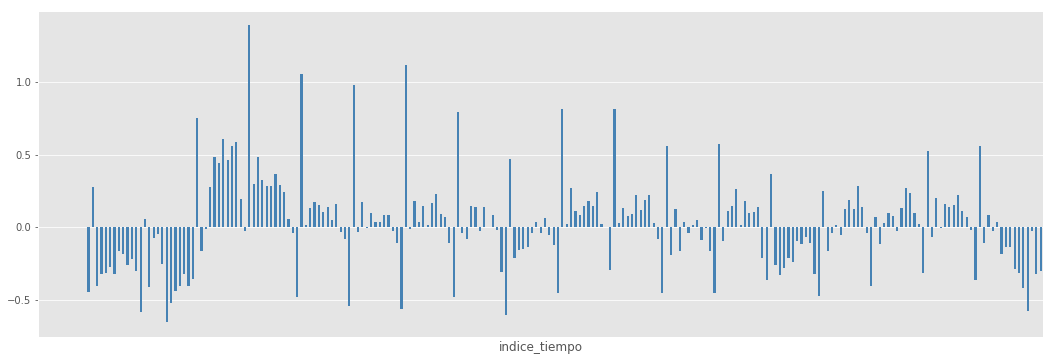

In [36]:
est_sin_tendencia_pct.plot.bar(figsize=(18,6), color="steelblue").set_xticks([])

In [37]:
# meses con picos de patentamientos
est_sin_tendencia_pct[est_sin_tendencia_pct > 0.5]

indice_tiempo
2003-01-01    0.751711
2003-07-01    0.608581
2003-09-01    0.557373
2003-10-01    0.590449
2004-01-01    1.391644
2005-01-01    1.056588
2006-01-01    0.979427
2007-01-01    1.118345
2008-01-01    0.795371
2010-01-01    0.817971
2011-01-01    0.812385
2012-01-01    0.561004
2013-01-01    0.575154
2017-01-01    0.528115
2018-01-01    0.561646
dtype: float64

In [38]:
# meses con pisos de patentamientos
est_sin_tendencia_pct[est_sin_tendencia_pct < -0.45]

indice_tiempo
2001-12-01   -0.583011
2002-06-01   -0.653927
2002-07-01   -0.519684
2004-12-01   -0.481604
2005-12-01   -0.545137
2006-12-01   -0.563703
2007-12-01   -0.480715
2008-12-01   -0.609255
2009-12-01   -0.454635
2011-12-01   -0.456137
2012-12-01   -0.457364
2014-12-01   -0.472124
2018-12-01   -0.575916
dtype: float64

Diciembre es un mes donde se patentan muy pocos autos y en enero es un mes donde hay picos de patentamiento, que en buena medida los compensan. ¿Sabés por qué?

**Ejercicio:** crear una función que junte provincia y id en una nueva columna, poniendo el id entre paréntesis como en "Buenos Aires (06)" y aplicarla para crear "provincia_nombre_id".

**Ejercicio para la casa:** repetir el análisis de estacionalidad para el caso de las motos. ¿Se verifica el mismo efecto en diciembre y enero?

Hint: observá que en el año 2006 los datos tienen algún problema... tal vez te convenga usar los datos desde 2007 en adelante.

## Graficar abriendo por una dimensión transversal

Hasta acá viste algunas cosas interesantes que se pueden ver a partir de los datos de patentamiento de autos a nivel nacional. Los patentamientos correlacionan fuertemente con el nivel de actividad y su estacionalidad tiene algunas pecularidades...

Pero probablemente haya diferencias por provincias (una dimensión transversal disponible en la tabla) que merezca la pena notar.

Ahora vas a tratar de graficar la evolución anual en los patentamientos para cada provincia.

In [39]:
# agrupamos por año y por provincia
autos_anio_prov = autos[autos.anio_inscripcion_inicial < 2019].groupby(
    ["anio_inscripcion_inicial", "provincia_inscripcion_inicial"]
).sum()["cantidad_inscripciones_iniciales"]

autos_anio_prov

anio_inscripcion_inicial  provincia_inscripcion_inicial
2000                      Buenos Aires                     116665
                          Catamarca                          2469
                          Chaco                              4117
                          Chubut                             6550
                          Ciudad Autónoma de Bs.As.         76343
                          Corrientes                         5027
                          Córdoba                           35797
                          Entre Ríos                         7688
                          Formosa                            2461
                          Jujuy                              4087
                          La Pampa                           3255
                          La Rioja                           2790
                          Mendoza                           11887
                          Misiones                           5323
                    

In [40]:
# tenemos que reiniciar el índice, para crear una serie de tiempo por provincia
autos_anio_prov = autos_anio_prov.reset_index()
autos_anio_prov.head()

,anio_inscripcion_inicial,provincia_inscripcion_inicial,cantidad_inscripciones_iniciales
0,2000,Buenos Aires,116665
1,2000,Catamarca,2469
2,2000,Chaco,4117
3,2000,Chubut,6550
4,2000,Ciudad Autónoma de Bs.As.,76343


In [41]:
# la función pivot_table permite hacer lo mismo que las tablas dinámicas en Excel
autos_series_provinciales = autos_anio_prov.pivot_table(index="anio_inscripcion_inicial", columns="provincia_inscripcion_inicial")
autos_series_provinciales

cantidad_inscripciones_iniciales            \
provincia_inscripcion_inicial                     Buenos Aires Catamarca   
anio_inscripcion_inicial                                                   
2000                                                    116665      2469   
2001                                                     63662      1381   
2002                                                     30166       578   
2003                                                     40104       443   
2004                                                     84576       902   
2005                                                    117888      1611   
2006                                                    136994      2491   
2007                                                    177389      3495   
2008                                                    191230      4074   
2009                                                    168093      3337   
2010                                                    219215      3860   
2011                                                    283057      5831   
2012                                                    281156      6471   
2013                                                    326954      7316   
2014                                                    219355      5731   
2015                                                    208990      5631   
2016                                                    232919      6030   
2017                                                    287748      7531   
2018                                                    241626      7199   

                                                                       \
provincia_inscripcion_inicial  Chaco Chubut Ciudad Autónoma de Bs.As.   
anio_inscripcion_inicial                                                
2000                            4117   6550                     76343   
2001                            2610   5373                     51946   
2002                            1368   2451                     24793   
2003                            2075   4170                     34042   
2004                            4325   7361                     66582   
2005                            5353   9416                     88108   
2006                            6504  11520                    100253   
2007                            8435  13586                    119100   
2008                           11877  15111                    116400   
2009                            9772  11981                     96479   
2010                            9658  13513                    123518   
2011                           14358  16788                    144434   
2012                           13997  17204                    139192   
2013                           15851  18272                    164739   
2014                           12816  15629                    109713   
2015                           13886  15575                     97881   
2016                           15421  14708                    106175   
2017                           21080  17717                    137462   
2018                           19201  16643                    128751   

                                                                            \
provincia_inscripcion_inicial Corrientes Córdoba Entre Ríos Formosa  Jujuy   
anio_inscripcion_inicial                                                     
2000                                5027   35797       7688    2461   4087   
2001                                2764   19669       3561    1437   1768   
2002                                1432   11727       1661     547    953   
2003                                2139   18071       3120     800   1426   
2004                                4289   31778       6719    1400   3317   
2005                                5888   39892       8729    2214   4055   
2006                                7063   45781

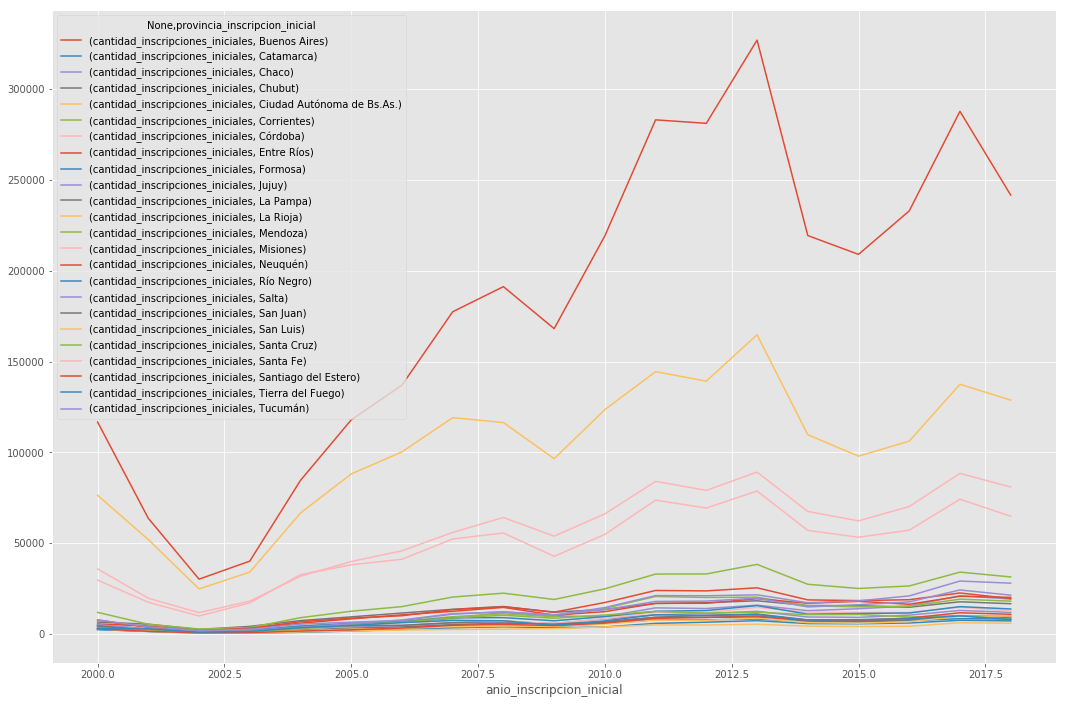

In [42]:
autos_series_provinciales.plot(figsize=(18,12))

Este gráfico no es simple de leer por dos motivos por un lado las escalas son muy diferentes entre provincias por lo que no podemos distiguir mas allá de 5 o 6 provincias y a su vez no resulta útil comparar la cantidad de inscripciónes iniciales sin tener en cuenta la población de cada provincia. Para esto último necesitamos trabajar con un activo de datos adicional.

## Cruzar datos

Para esto vamos a usar los ids de INDEC por provincia y los datos de población que están en el repositorio.

In [43]:
poblacion = pd.read_csv("data/poblacion.csv")

In [44]:
poblacion.head()

,anio,provincia_id,poblacion
0,2010,2,3028481
1,2010,6,15716942
2,2010,10,377676
3,2010,14,3373025
4,2010,18,1017731


Necesitamos volver a construir la tabla de datos por provincia, pero conservando el id.

In [45]:
# agrupamos por año y por provincia, conservando los ids y reiniciando el índice
autos_anio_prov_id = autos[autos.anio_inscripcion_inicial < 2019].groupby(
    ["anio_inscripcion_inicial", "provincia_inscripcion_inicial", "provincia_indec_id"]
).sum()["cantidad_inscripciones_iniciales"].reset_index()

autos_anio_prov_id

,anio_inscripcion_inicial,provincia_inscripcion_inicial,provincia_indec_id,cantidad_inscripciones_iniciales
0,2000,Buenos Aires,6,116665
1,2000,Catamarca,10,2469
2,2000,Chaco,22,4117
3,2000,Chubut,26,6550
4,2000,Ciudad Autónoma de Bs.As.,2,76343
5,2000,Corrientes,18,5027
6,2000,Córdoba,14,35797
7,2000,Entre Ríos,30,7688
8,2000,Formosa,34,2461
9,2000,Jujuy,38,4087


In [46]:
autos_poblacion = autos_anio_prov_id.merge(poblacion, 
                         left_on=["anio_inscripcion_inicial", "provincia_indec_id"],
                         right_on=["anio", "provincia_id"]
                        )

autos_poblacion

,anio_inscripcion_inicial,provincia_inscripcion_inicial,provincia_indec_id,cantidad_inscripciones_iniciales,anio,provincia_id,poblacion
0,2010,Buenos Aires,6,219215,2010,6,15716942
1,2010,Catamarca,10,3860,2010,10,377676
2,2010,Chaco,22,9658,2010,22,1080017
3,2010,Chubut,26,13513,2010,26,513433
4,2010,Ciudad Autónoma de Bs.As.,2,123518,2010,2,3028481
5,2010,Corrientes,18,14119,2010,18,1017731
6,2010,Córdoba,14,66129,2010,14,3373025
7,2010,Entre Ríos,30,17317,2010,30,1255574
8,2010,Formosa,34,5828,2010,34,551626
9,2010,Jujuy,38,8247,2010,38,683513


In [47]:
autos_poblacion["autos_patent_1000hab"] = autos_poblacion.cantidad_inscripciones_iniciales / (autos_poblacion.poblacion/1000)

In [48]:
# tenemos que reiniciar el índice, para crear una serie de tiempo por provincia
#autos_poblacion = autos_poblacion.reset_index()
#autos_poblacion.head()

In [49]:
# la función pivot_table permite hacer lo mismo que las tablas dinámicas en Excel
autos_poblacion_series_provinciales = autos_poblacion[["anio_inscripcion_inicial","provincia_inscripcion_inicial","autos_patent_1000hab"]].pivot_table(index="anio_inscripcion_inicial", columns="provincia_inscripcion_inicial")
autos_poblacion_series_provinciales

autos_patent_1000hab                        \
provincia_inscripcion_inicial         Buenos Aires  Catamarca      Chaco   
anio_inscripcion_inicial                                                   
2010                                     13.947688  10.220401   8.942452   
2011                                     17.791577  15.282481  13.140831   
2012                                     17.462435  16.789999  12.663759   
2013                                     20.071335  18.794829  14.178592   
2014                                     13.313487  14.579433  11.335494   
2015                                     12.544470  14.187631  12.146595   
2016                                     13.830362  15.049491  13.343163   
2017                                     16.906451  18.621131  18.045396   
2018                                     14.050967  17.638037  16.265459   

                                                                               \
provincia_inscripcion_inicial     Chubut Ciudad Autónoma de Bs.As. Corrientes   
anio_inscripcion_inicial                                                        
2010                           26.318916                 40.785463  13.873018   
2011                           32.025883                 47.610807  20.074924   
2012                           32.160316                 45.804019  19.336033   
2013                           33.486299                 54.117900  19.301932   
2014                           28.093594                 35.980571  14.596598   
2015                           27.472915                 32.047296  13.943041   
2016                           25.469898                 34.707671  14.086827   
2017                           30.133207                 44.867560  17.554618   
2018                           27.813430                 41.965188  16.405651   

                                                                           \
provincia_inscripcion_inicial    Córdoba Entre Ríos    Formosa      Jujuy   
anio_inscripcion_inicial                                                    
2010                           19.605250  13.792098  10.565129  12.065608   
2011                           24.621802  18.872996  13.985424  15.188213   
2012                           22.910313  18.500996  13.781241  16.091220   
2013                           25.535373  19.613611  14.514429  17.544897   
2014                           19.112208  14.337800  11.731841  12.983834   
2015                           17.453206  13.892683  12.255503  12.572481   
2016                           19.453271  14.123758  12.483451  14.064371   
2017                           24.259318  16.744242  14.283389  17.369963   
2018                           21.956944  14.313720  13.802050  15.768858   

                                 ...                                       \
provincia_inscripcion_inicial    ...        Neuquén  Río Negro      Salta   
anio_inscripcion_inicial         ...                                        
2010                             ...      21.475407  14.756038  10.775467   
2011                             ...      28.976140  18.935862  14.227679   
2012                             ...      28.578578  19.296716  14.162977   
2013                             ...      32.289356  23.005405  15.229053   
2014                             ...      27.674712  15.856333  11.316426   
2015                             ...      28.960298  16.134525  12.070963   
2016                             ...      26.004258  16.276829  13.050734   
2017                             ...      32.482486  20.936595  17.675181   
2018                             ...      31.135588  18.876913  15.391795   

                                                                           \
provincia_inscripcion_inicial   San Juan   San Luis Santa Cruz   Santa Fe   
anio_inscripcion_inicial                                                    
2010                            9.771921  12.411475  37.890449 

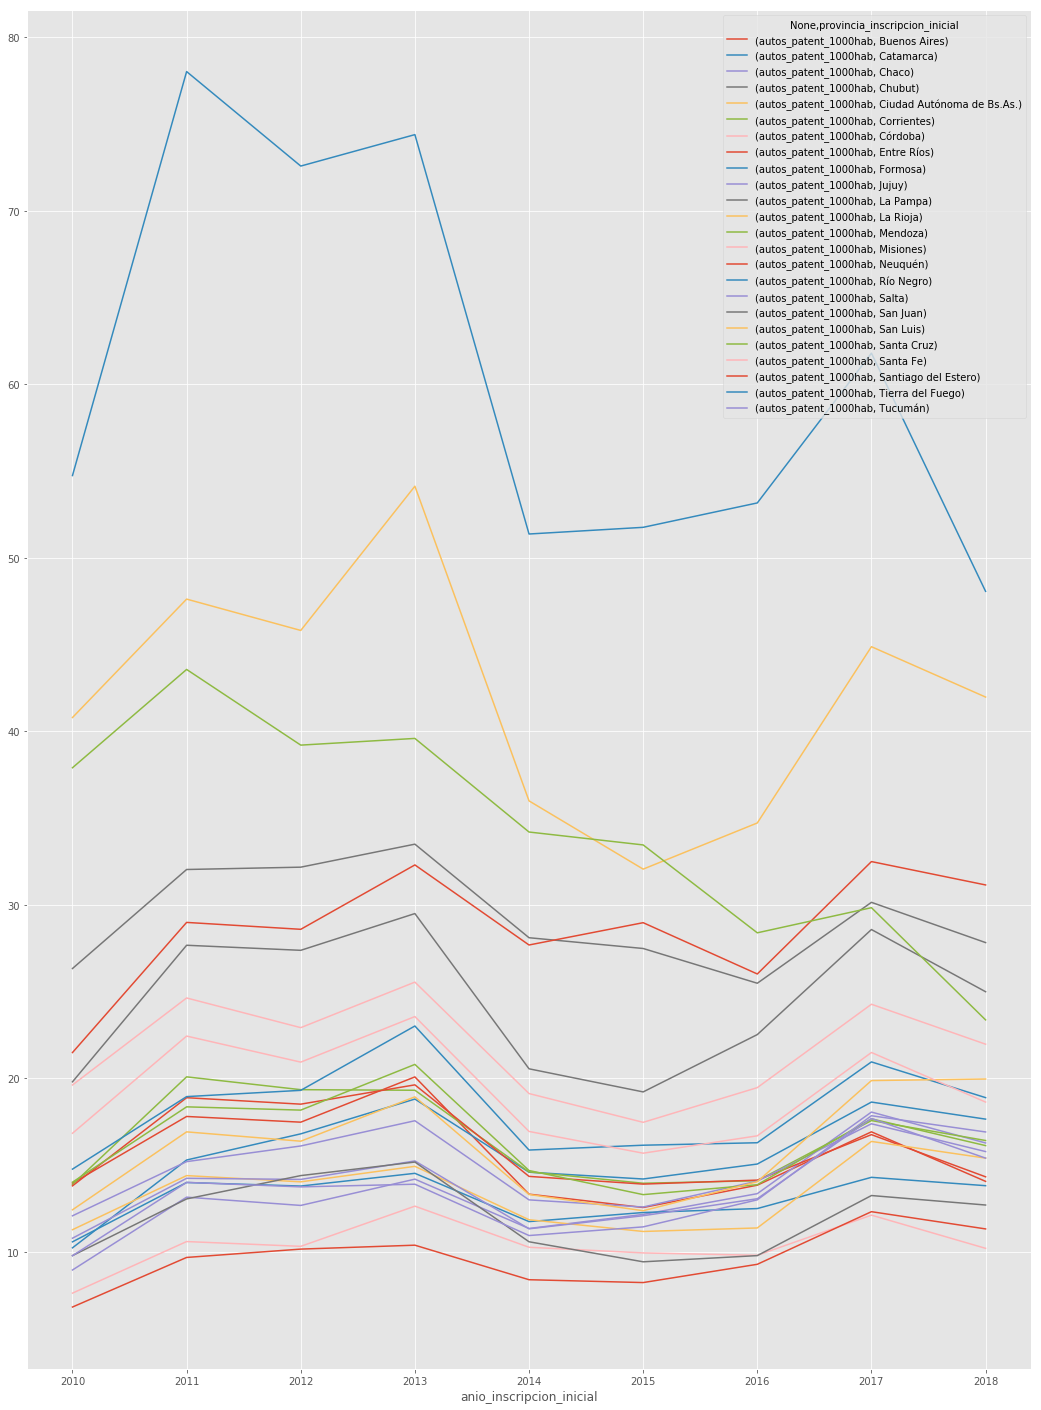

In [50]:
autos_poblacion_series_provinciales.plot(figsize=(18,25))

Ahora, las series resultan mas interesantes de comparar pero nuevamente el gráfico no es fácil de leer... probemos con separarlo en varios más pequeños por provincia. El parámetro `subplots` te permite hacer un gráfico por línea y `layout` organizar la grilla de gráficos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DA89DA0>,
      dtype=object)

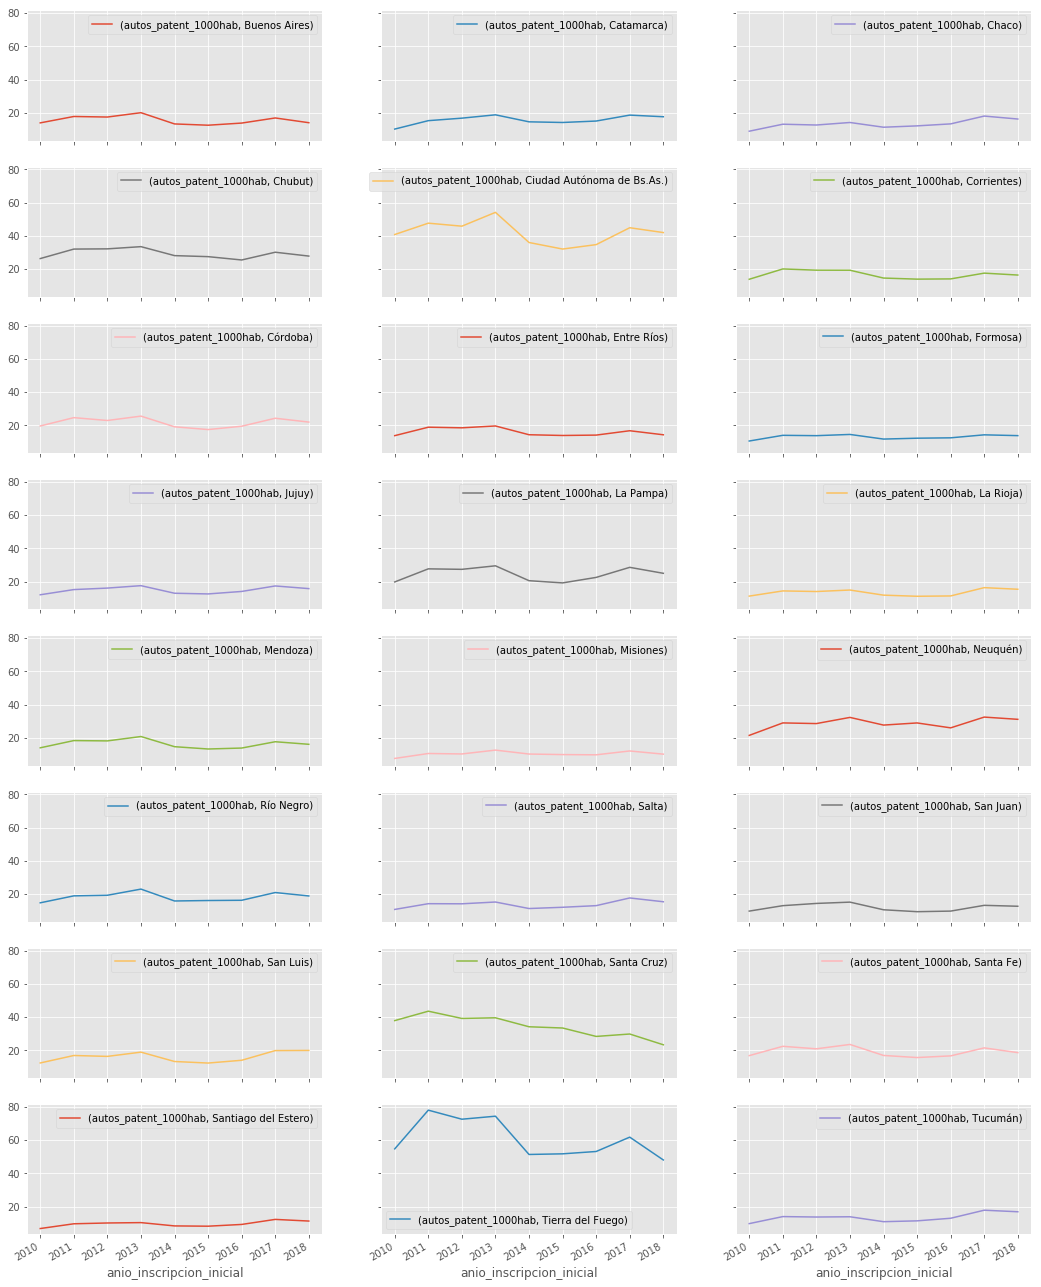

In [51]:
autos_poblacion_series_provinciales.plot(figsize=(18,25), subplots=True, layout=(8,3), sharey=True)

Este gráfico ofrece un poco más de información, vemos que CABA y Tierra del fuego tienen niveles de inscripción cada mil habitantes muy superiores al resto. Veamos ahora, como se comportan las inscripciones en cada provincia independientemente de los niveles.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000104302E8>,
      dtype=object)

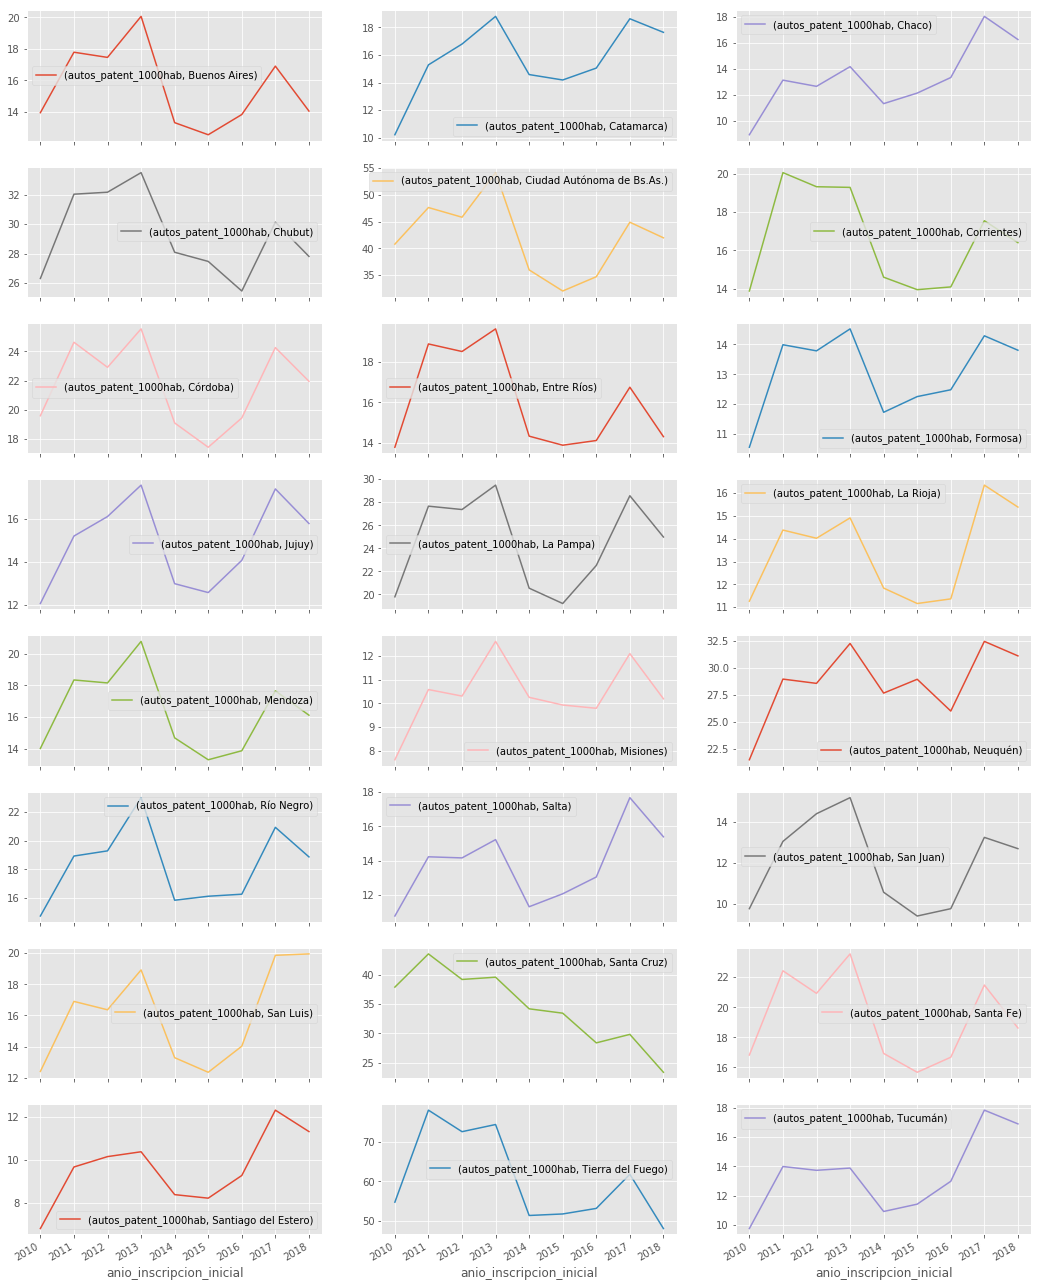

In [52]:
autos_poblacion_series_provinciales.plot(figsize=(18,25), subplots=True, layout=(8,3))

**Revisemos en detalle qué paso en año 2018.**

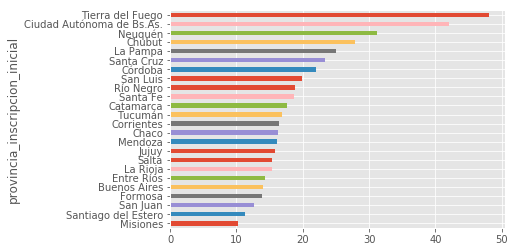

In [53]:
autos_poblacion[autos_poblacion.anio_inscripcion_inicial == 2018].set_index("provincia_inscripcion_inicial")["autos_patent_1000hab"].sort_values().plot("barh")

## Heatmaps

Veamos si esto fue siempre así, o si fue cambiando con el tiempo. Como alternativa a los gráficos que ya vimos, en este caso puede ser conveniente hacer un mapa de calor.

Para eso primero hay que hacer una tabla dinámica con los datos que queremos ver: año, provincia y cantidad de patentamientos c/1000 habitantes.

In [54]:
evolucion_patent_prov = autos_poblacion[
    ["anio_inscripcion_inicial", "provincia_inscripcion_inicial", "autos_patent_1000hab"]
].pivot_table(index="anio_inscripcion_inicial", columns="provincia_inscripcion_inicial").sort_values(2018, axis=1)

evolucion_patent_prov

autos_patent_1000hab                      \
provincia_inscripcion_inicial             Misiones Santiago del Estero   
anio_inscripcion_inicial                                                 
2010                                      7.609054            6.808106   
2011                                     10.582053            9.665744   
2012                                     10.305990           10.147092   
2013                                     12.621556           10.372489   
2014                                     10.252507            8.382100   
2015                                      9.927311            8.217891   
2016                                      9.789218            9.270778   
2017                                     12.103997           12.303675   
2018                                     10.191562           11.310189   

                                                                             \
provincia_inscripcion_inicial   San Juan    Formosa Buenos Aires Entre Ríos   
anio_inscripcion_inicial                                                      
2010                            9.771921  10.565129    13.947688  13.792098   
2011                           13.039060  13.985424    17.791577  18.872996   
2012                           14.383658  13.781241    17.462435  18.500996   
2013                           15.164235  14.514429    20.071335  19.613611   
2014                           10.569435  11.731841    13.313487  14.337800   
2015                            9.414595  12.255503    12.544470  13.892683   
2016                            9.771394  12.483451    13.830362  14.123758   
2017                           13.234232  14.283389    16.906451  16.744242   
2018                           12.687321  13.802050    14.050967  14.313720   

                                                                           \
provincia_inscripcion_inicial   La Rioja      Salta      Jujuy    Mendoza   
anio_inscripcion_inicial                                                    
2010                           11.264456  10.775467  12.065608  14.003765   
2011                           14.382982  14.227679  15.188213  18.345959   
2012                           14.023650  14.162977  16.091220  18.157757   
2013                           14.916815  15.229053  17.544897  20.791470   
2014                           11.839329  11.316426  12.983834  14.675323   
2015                           11.163142  12.070963  12.572481  13.286302   
2016                           11.365617  13.050734  14.064371  13.858089   
2017                           16.352464  17.675181  17.369963  17.654374   
2018                           15.390637  15.391795  15.768858  16.112508   

                                    ...                               \
provincia_inscripcion_inicial       ...          Santa Fe  Río Negro   
anio_inscripcion_inicial            ...                                
2010                                ...         16.823378  14.756038   
2011                                ...         22.425830  18.935862   
2012                                ...         20.923804  19.296716   
2013                                ...         23.549426  23.005405   
2014                                ...         16.927819  15.856333   
2015                                ...         15.674613  16.134525   
2016                                ...         16.676222  16.276829   
2017                                ...         21.478866  20.936595   
2018                                ...         18.621496  18.876913   

                                                                           \
provincia_inscripcion_inicial   San Luis    Córdoba Santa Cruz   La Pampa   
anio_inscripcion_inicial                                                    
2010                           12.411475  19.605250  37.890449  19.787297   
2011                           16.903697  24.621802  43.556224  27.659355   
2012             

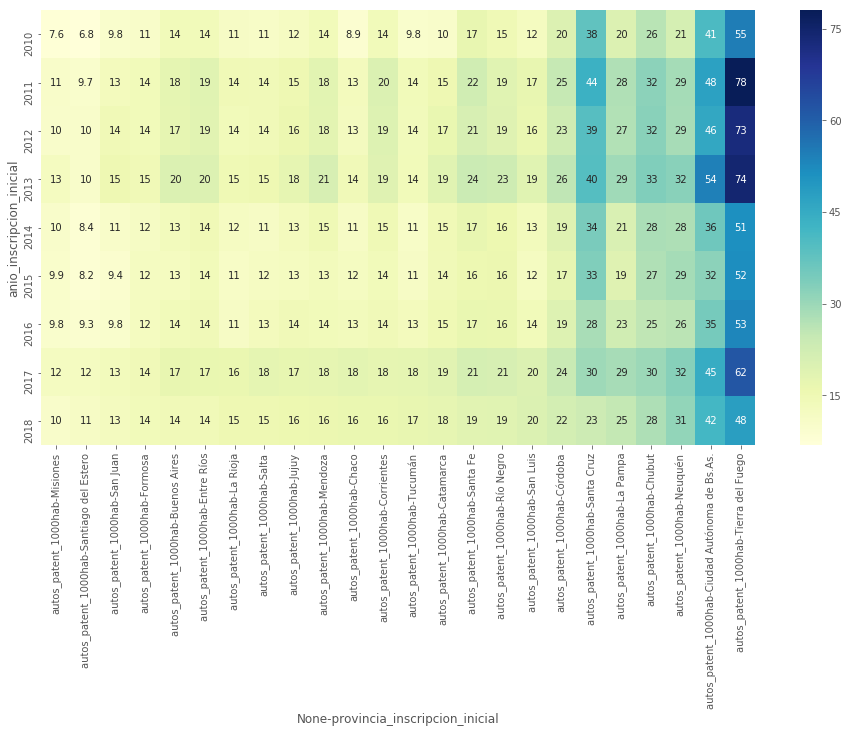

In [55]:
plt.figure(figsize = (16,8))
ax = sns.heatmap(evolucion_patent_prov, annot=True, cmap="YlGnBu")

Es difícil ver la evolución de la mayoría de las provincias con los "outliers" de Tierra del Fuego y la CABA. Para esto podemos limitar el rango de colores, por ejemplo poniendo el máximo más cerca de valores a los que alcancen otras provincias.

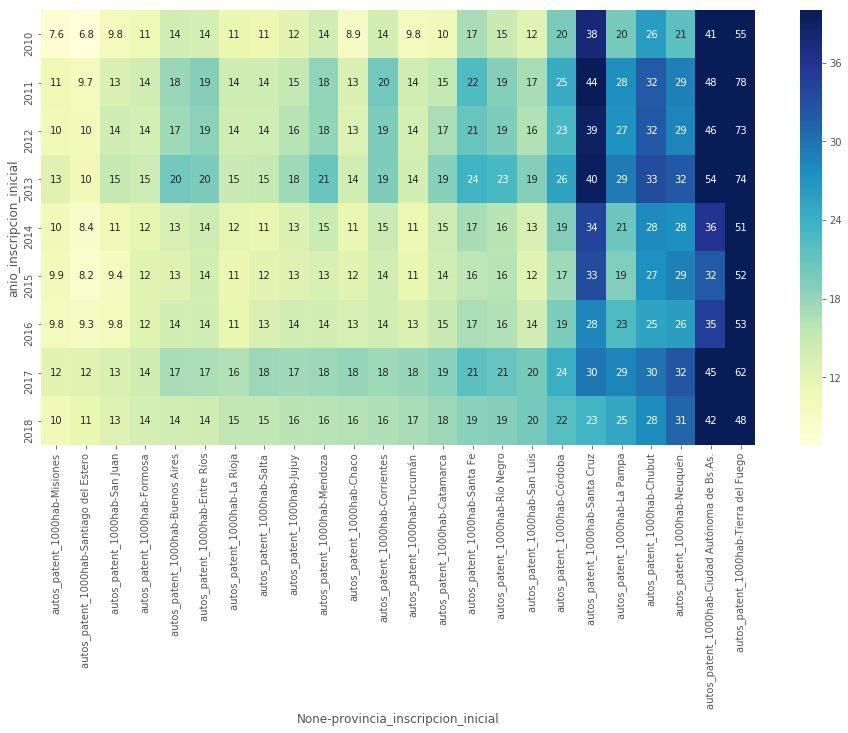

In [56]:
plt.figure(figsize = (16,8))
ax = sns.heatmap(evolucion_patent_prov, annot=True, cmap="YlGnBu", vmax=40)

Probablemente resulte cómodo comparar los patentamientos cada mil habitantes por provincia en un mapa. Esto se puede hacer fácilmente con `geopandas`, cargando un shapefile de las provincias argentinas.

In [57]:
provincias = gpd.read_file("http://apis.datos.gob.ar/georef/api/provincias?formato=shp")

La columna *geometry* contiene los polígonos de las provincias.

In [58]:
provincias

,centr_lat,centr_lon,nombre,id,geometry
0,-32.142933,-63.801753,Córdoba,14,POLYGON ((-63.87371381699995 -29.6237749749999...
1,-26.386431,-60.765831,Chaco,22,POLYGON ((-58.68415018399998 -26.6121911539999...
2,-43.788623,-68.526759,Chubut,26,(POLYGON ((-71.85479930299994 -43.496446493999...
3,-36.676942,-60.558832,Buenos Aires,06,(POLYGON ((-60.26318556899997 -33.259891773999...
4,-27.335833,-66.947682,Catamarca,10,POLYGON ((-67.97103633899997 -25.2267908609999...
5,-32.058874,-59.201448,Entre Ríos,30,POLYGON ((-58.58137670599996 -30.1601009819999...
6,-24.894973,-59.932441,Formosa,34,POLYGON ((-58.68042590199997 -26.6331363479999...
7,-37.131554,-65.446655,La Pampa,42,POLYGON ((-64.46428512299997 -35.0000522329999...
8,-40.405796,-67.22933,Río Negro,62,(POLYGON ((-64.76547241199995 -40.783512114999...
9,-30.865368,-68.889491,San Juan,70,POLYGON ((-67.32964173799996 -32.3588264019999...


Los ids de las provincias fueron leídos como números en lugar de como texto, y les faltan los ceros a la izquierda. Esto se puede resolver convirtiendo la columna en `str` con la función `astype()` y luego aplicando la función `zfill()` que permite "llenar con ceros hasta X cantidad de caracteres" (sólo se puede usar son strings).

In [59]:
autos_poblacion["provincia_id"] = autos_poblacion.provincia_id.astype(str).str.zfill(2)

Por último necesitamos agregar a la capa de provincias el dato que queremos graficar. Esto se puede hacer filtrando la tabla principal para el 2018 y luego haciendo un `merge()` con las provincias.

`left_on` y `right_on` sirven para indicar qué columnas hay que usar en cada tabla para hacer el merge.

In [60]:
provincias_patent_2018 = provincias.merge(
    autos_poblacion[autos_poblacion.anio == 2018][["provincia_id", "autos_patent_1000hab"]],
    left_on="id", 
    right_on="provincia_id"
)

C:\Program Files\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


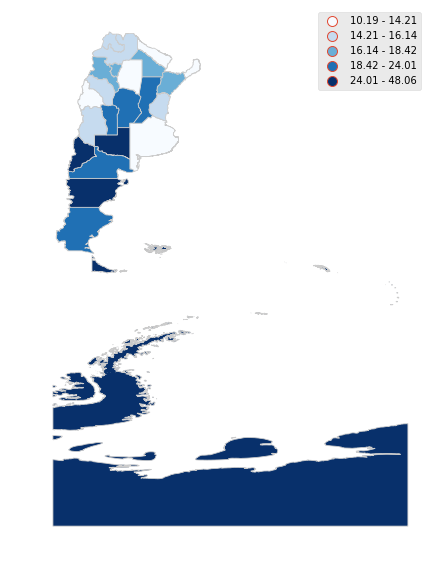

In [61]:

provincias_patent_2018.plot(figsize=(10, 10), column="autos_patent_1000hab", cmap='Blues', scheme='quantiles', legend=True, linewidth=0.8, edgecolor='0.8').set_axis_off()


Vamos a usar una función auxiliar también para poner etiquetas con los valores en las provincias.

In [62]:
from helpers import add_labels_to_geodataframe

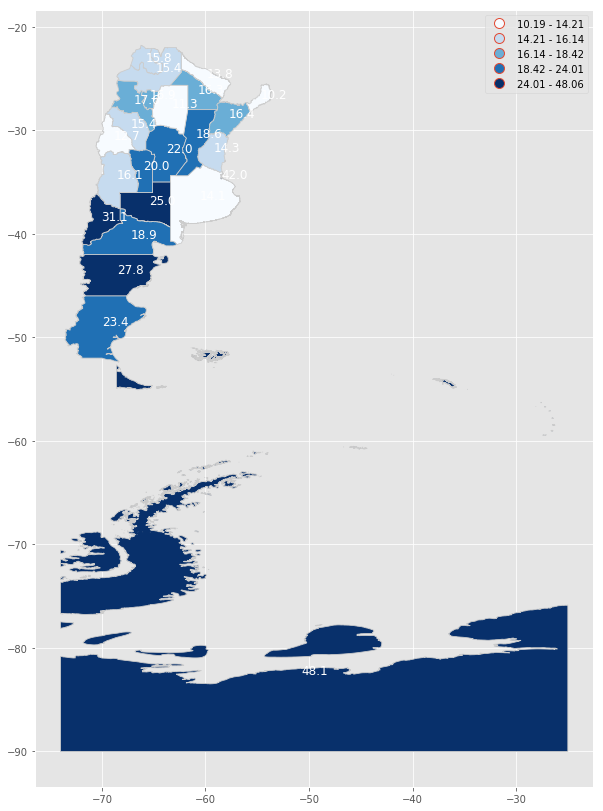

In [63]:
ax = provincias_patent_2018.plot(figsize=(10, 15), column="autos_patent_1000hab", 
                                                                    cmap='Blues', scheme='quantiles', legend=True, linewidth=0.8, edgecolor='0.8')


add_labels_to_geodataframe(ax, provincias_patent_2018, "autos_patent_1000hab", round_decimals=1)